In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import matplotlib.patches as mpatches

In [2]:
data = pd.read_csv("/Users/davidhernandez/Documents/Arc/Model_Accuracies_Part1.csv")
data.describe()

,Teacher Acc. (%),CF,Student Baseline Acc. (%),Student Distilled Acc. (%),Delta Acc.,Rel. Delta Acc. (%)
count,60.000000,57.000000,41.000000,60.000000,60.000000,41.000000
mean,84.875167,11.414912,80.187805,83.257833,-1.480667,47.561220
std,11.481075,19.687758,11.414350,12.095960,2.043276,134.135655
min,47.650000,0.000000,50.650000,44.710000,-8.630000,-321.620000
25%,77.467500,1.910000,72.270000,74.932500,-2.645000,19.010000
50%,86.525000,3.300000,77.320000,83.985000,-0.985000,64.070000
75%,95.142500,15.530000,91.280000,94.437500,-0.277500,87.350000
max,99.540000,127.020000,98.650000,99.550000,4.210000,527.780000


In [3]:
data = data.dropna(subset='CF')

In [4]:
data.describe()

,Teacher Acc. (%),CF,Student Baseline Acc. (%),Student Distilled Acc. (%),Delta Acc.,Rel. Delta Acc. (%)
count,57.000000,57.000000,38.000000,57.000000,57.000000,38.000000
mean,85.008246,11.414912,80.420789,83.460526,-1.403860,47.793158
std,11.585274,19.687758,11.505353,12.162141,2.046513,139.360972
min,47.650000,0.000000,50.650000,44.710000,-8.630000,-321.620000
25%,77.940000,1.910000,72.462500,75.150000,-2.400000,15.602500
50%,86.700000,3.300000,77.935000,84.570000,-0.960000,68.300000
75%,95.240000,15.530000,92.945000,94.490000,-0.210000,93.642500
max,99.540000,127.020000,98.650000,99.550000,4.210000,527.780000


In [5]:
data.head()

,Teacher Acc. (%),CF,Student Baseline Acc. (%),Student Distilled Acc. (%),Delta Acc.,Rel. Delta Acc. (%),Dataset,Article
0,99.48,15.70,NaN,99.28,-0.20,NaN,MNIST,wang2019private
1,99.48,32.23,NaN,98.94,-0.54,NaN,MNIST,wang2019private
2,96.36,20.14,NaN,95.39,-0.97,NaN,SVHN,wang2019private
3,96.36,45.25,NaN,94.49,-1.87,NaN,SVHN,wang2019private
4,86.35,6.00,NaN,84.57,-1.78,NaN,CIFAR10,wang2019private


In [6]:
len(data['Dataset'].unique()), len(data['CF']), len(data['Student Distilled Acc. (%)'])

(11, 57, 57)

In [7]:
mean_acc = data['Student Distilled Acc. (%)'].mean()
mean_cf = data['CF'].mean()
mean_acc, mean_cf

(83.46052631578945, 11.414912280701754)

In [8]:
# # List of datasets to keep
# datasets_to_keep = ['MNIST', 'SVHN', 'CIFAR10', 'CIFAR100', 'ImageNet', 'Tiny-ImageNet']

# # Filter the DataFrame to only keep rows where the 'Dataset' column matches one of the specified datasets
# data = data[data['Dataset'].isin(datasets_to_keep)]

In [9]:
data = data[data['CF'] != 0]

In [10]:
data.describe()

,Teacher Acc. (%),CF,Student Baseline Acc. (%),Student Distilled Acc. (%),Delta Acc.,Rel. Delta Acc. (%)
count,54.000000,54.000000,38.000000,54.000000,54.000000,38.000000
mean,85.561296,12.049074,80.420789,83.977593,-1.427407,47.793158
std,11.456217,20.044018,11.505353,12.100991,2.098371,139.360972
min,47.650000,1.360000,50.650000,44.710000,-8.630000,-321.620000
25%,78.317500,1.947500,72.462500,75.902500,-2.557500,15.602500
50%,86.700000,3.435000,77.935000,85.355000,-0.965000,68.300000
75%,95.352500,15.530000,92.945000,94.520000,-0.202500,93.642500
max,99.540000,127.020000,98.650000,99.550000,4.210000,527.780000


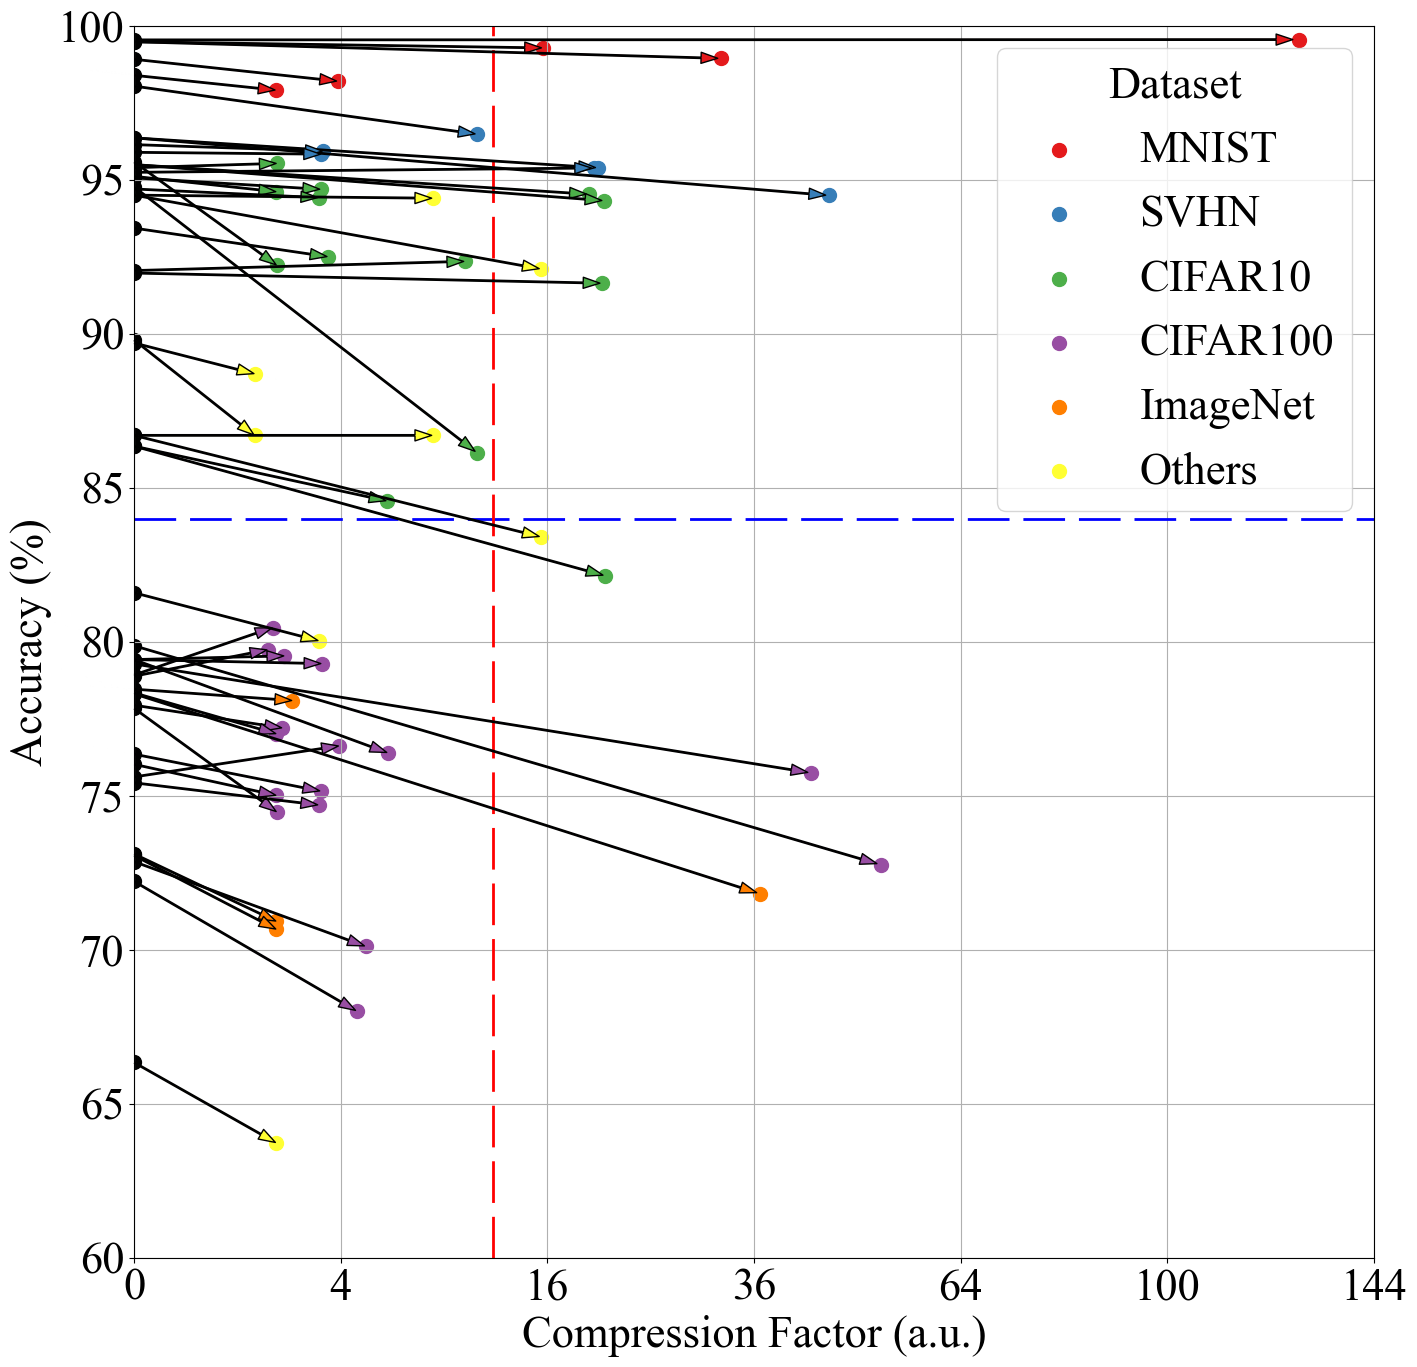

In [30]:
colors = sns.color_palette("Set1", n_colors=len(data['Dataset'].unique()))

dataset_handles = []
texts = []
accs = []
cfs = []
dash = (15,5)
data_group_id = 0
grouped_datasets = ['DukeMTMCreID', 'Caltech256', 'Market1501', 'CelebA', 'CUHK03', 'Tiny-ImageNet']
data['Dataset Grouped'] = data['Dataset'].apply(lambda x: 'Others' if x in grouped_datasets else x)

# Recalculate unique datasets for updated coloring
unique_datasets = data['Dataset Grouped'].unique()

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 32

# Create figure and axes
plt.figure(figsize=(16, 16))
ax = plt.gca()

# Plot dashed lines
dash = (15, 5)
mean_acc = data['Student Distilled Acc. (%)'].mean()
mean_cf = data['CF'].mean()
ax.axhline(y=0, color='black', linestyle='--', linewidth=2.0, dashes=dash)
ax.axhline(y=mean_acc, color="blue", linestyle="--", linewidth=2.0, dashes=dash)
ax.axvline(x=mean_cf**.5, color="red", linestyle="--", linewidth=2.0, dashes=dash)

# Scatter plot and arrows for each dataset group with specified colors
for i, dataset in enumerate(unique_datasets):
    subset = data[data['Dataset Grouped'] == dataset]
    ax.scatter(subset['CF'] ** .5, subset['Student Distilled Acc. (%)'], color=colors[i], label=dataset, s=100)
    ax.scatter(subset['CF']* 0, subset['Teacher Acc. (%)'], color='black', s=100)
    # Draw arrows from teacher's accuracy at CF=0 to each student's accuracy at their CF
    for _, row in subset.iterrows():
        ax.annotate('', xy=(row['CF']** 0.5, row['Student Distilled Acc. (%)']), xytext=(0, row['Teacher Acc. (%)']),
                    arrowprops=dict(facecolor=colors[i], shrink=0.005, width=1, headwidth=8))
        
# Label and title configuration
plt.xlabel("Compression Factor (a.u.)")
plt.ylabel("Accuracy (%)")
plt.legend(title="Dataset")
plt.grid(True)
plt.ylim(60, 100)
plt.xlim(0,12)
plt.xticks([0, 2, 4, 6, 8, 10, 12], [0, 4, 16, 36, 64, 100, 144])
plt.savefig("Hernandez2024_lit_review_plot.pdf")
plt.show()

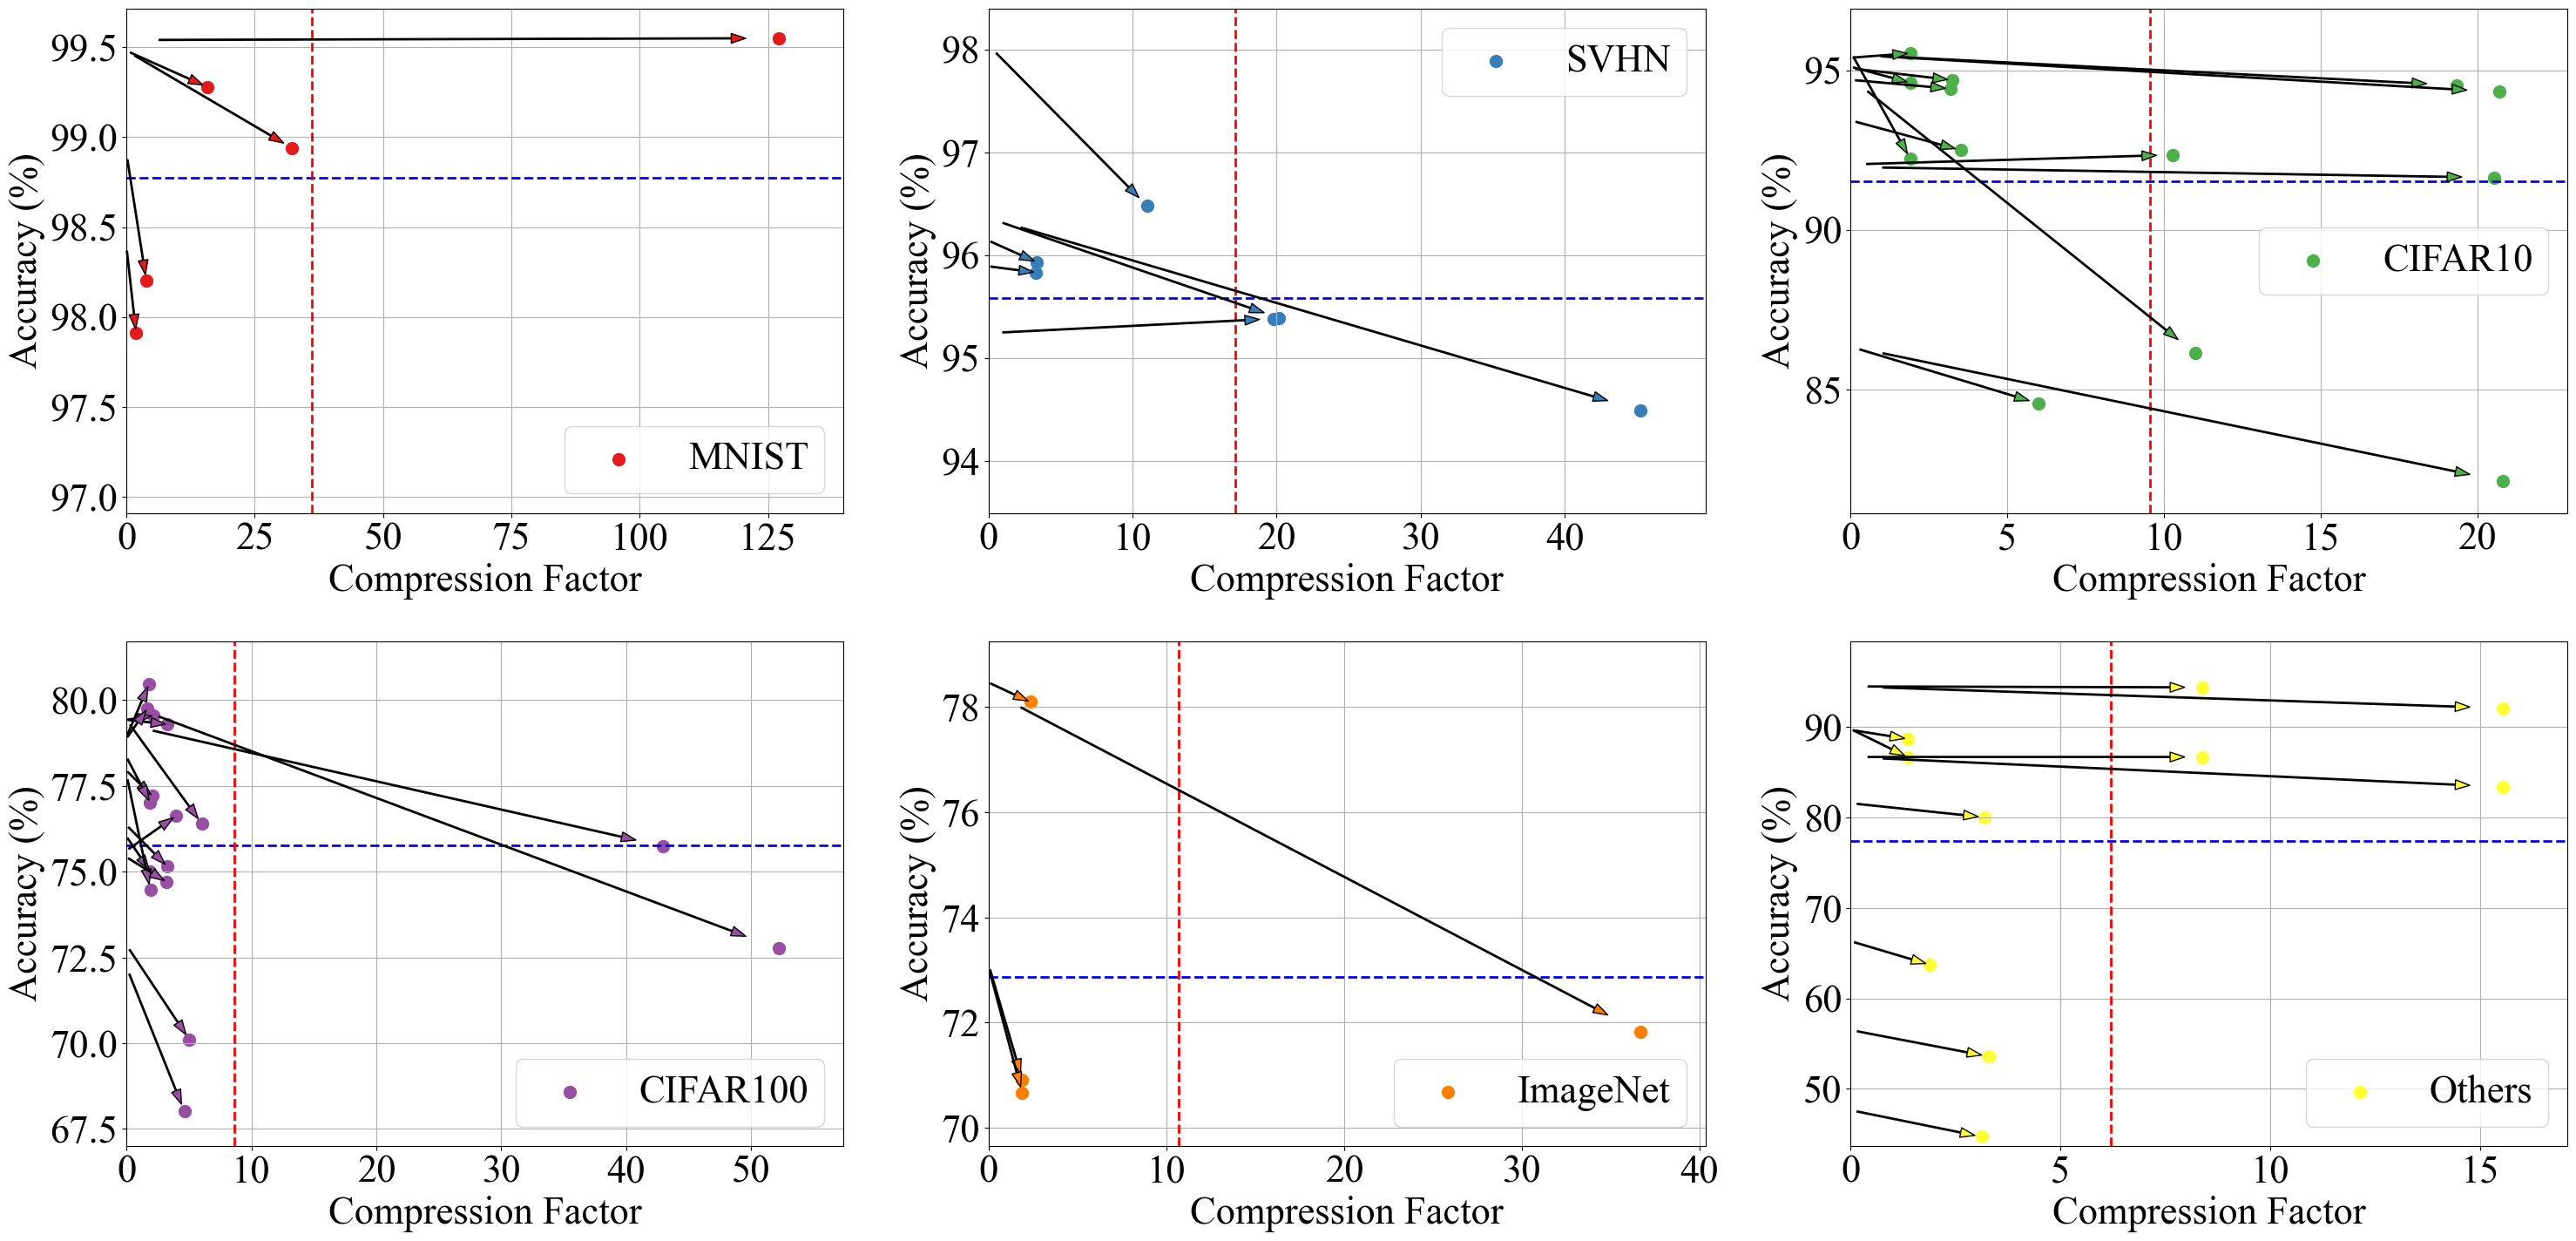

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))  # Adjust for a 2x3 grid
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot each dataset in a separate subplot
for i, dataset in enumerate(unique_datasets):
    ax = axes[i]
    subset = data[data['Dataset Grouped'] == dataset]

    # Calculate local limits
    local_min_cf = 0  # Start from zero to include compression factor 0
    local_max_cf = subset['CF'].max() + (subset['CF'].max() - 0) * 0.1
    local_min_acc = min(subset['Student Distilled Acc. (%)'].min(), subset['Teacher Acc. (%)'].min())
    local_max_acc = max(subset['Student Distilled Acc. (%)'].max(), subset['Teacher Acc. (%)'].max())

    # Dashed lines for mean
    mean_acc = subset['Student Distilled Acc. (%)'].mean()
    mean_cf = subset['CF'].mean()
    ax.axhline(y=mean_acc, color="blue", linestyle="--", linewidth=2.0)
    ax.axvline(x=mean_cf, color="red", linestyle="--", linewidth=2.0)

    # Scatter plot and arrows
    ax.scatter(subset['CF'], subset['Student Distilled Acc. (%)'], color=colors[i], label=dataset, s=100)
    for _, row in subset.iterrows():
        ax.annotate('', xy=(row['CF'], row['Student Distilled Acc. (%)']), xytext=(0, row['Teacher Acc. (%)']),
                    arrowprops=dict(facecolor=colors[i], shrink=0.05, width=1, headwidth=8))

    # Set local limits with padding
    ax.set_xlim([local_min_cf, local_max_cf])
    ax.set_ylim([local_min_acc-1, local_max_acc + (local_max_acc - local_min_acc) * 0.1])

    # Labels and grid
    ax.set_xlabel("Compression Factor")
    ax.set_ylabel("Accuracy (%)")
    ax.legend(loc='best')
    ax.grid(True)

# Turn off unused subplot axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

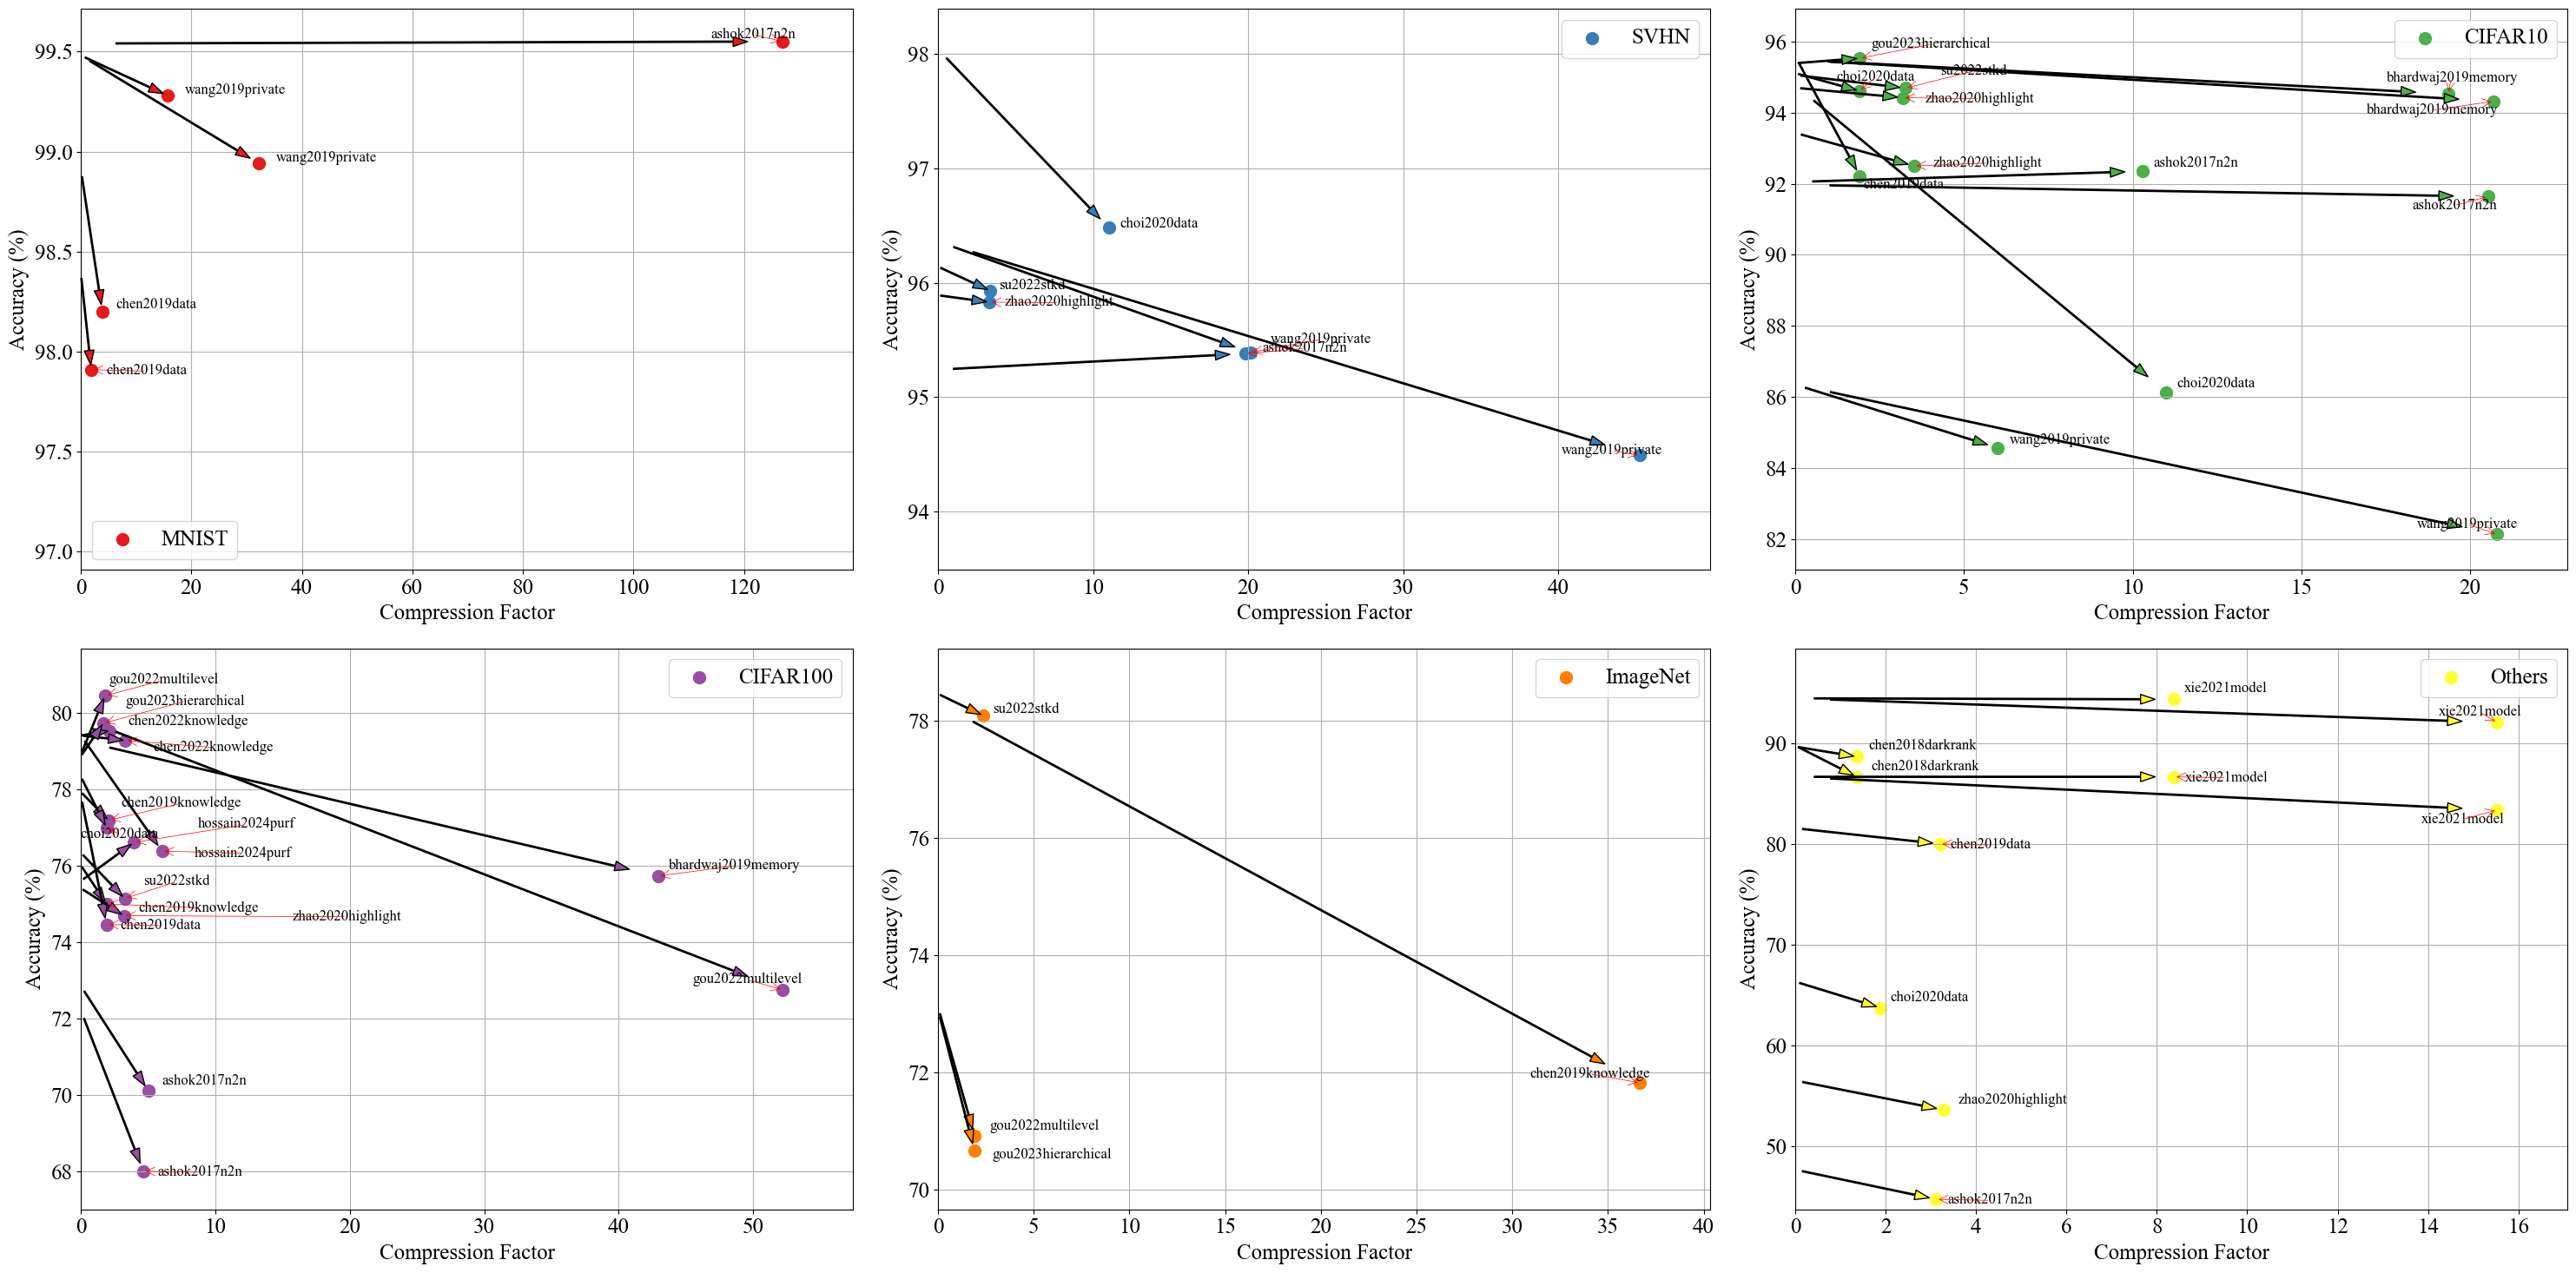

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from adjustText import adjust_text

# Assuming data is already loaded and 'Dataset Grouped' is created
unique_datasets = data['Dataset Grouped'].unique()
colors = sns.color_palette("Set1", n_colors=len(unique_datasets))

# Plot settings
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))  # Adjust for a 2x3 grid
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot each dataset in a separate subplot
for i, dataset in enumerate(unique_datasets):
    ax = axes[i]
    subset = data[data['Dataset Grouped'] == dataset]

    # Calculate local limits for better visualization
    local_min_cf = 0  # Start from zero to include compression factor 0
    local_max_cf = subset['CF'].max() + (subset['CF'].max() - 0) * 0.1
    local_min_acc = min(subset['Student Distilled Acc. (%)'].min(), subset['Teacher Acc. (%)'].min())
    local_max_acc = max(subset['Student Distilled Acc. (%)'].max(), subset['Teacher Acc. (%)'].max())

    # Scatter plot and arrows
    points = ax.scatter(subset['CF'], subset['Student Distilled Acc. (%)'], color=colors[i], label=dataset, s=100)

    # Add text annotations for each point and arrows from teacher's accuracy
    texts = []
    for _, row in subset.iterrows():
        # Arrow from teacher accuracy at CF=0 to each student's accuracy
        ax.annotate('', xy=(row['CF'], row['Student Distilled Acc. (%)']), xytext=(0, row['Teacher Acc. (%)']),
                    arrowprops=dict(facecolor=colors[i], shrink=0.05, width=1, headwidth=8))
        # Text for article next to each point
        texts.append(ax.text(row['CF'], row['Student Distilled Acc. (%)'], row['Article'], fontsize=12))

    # Use adjust_text to automatically adjust text positions
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5), ax=ax,
                expand_points=(1.2, 1.4), expand_text=(1.2, 1.4), force_points=0.5)

    # Set local limits with padding
    ax.set_xlim([local_min_cf, local_max_cf])
    ax.set_ylim([local_min_acc-1, local_max_acc + (local_max_acc - local_min_acc) * 0.1])

    # Labels and grid
    ax.set_xlabel("Compression Factor")
    ax.set_ylabel("Accuracy (%)")
    ax.legend(loc='best')
    ax.grid(True)

# Turn off unused subplot axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

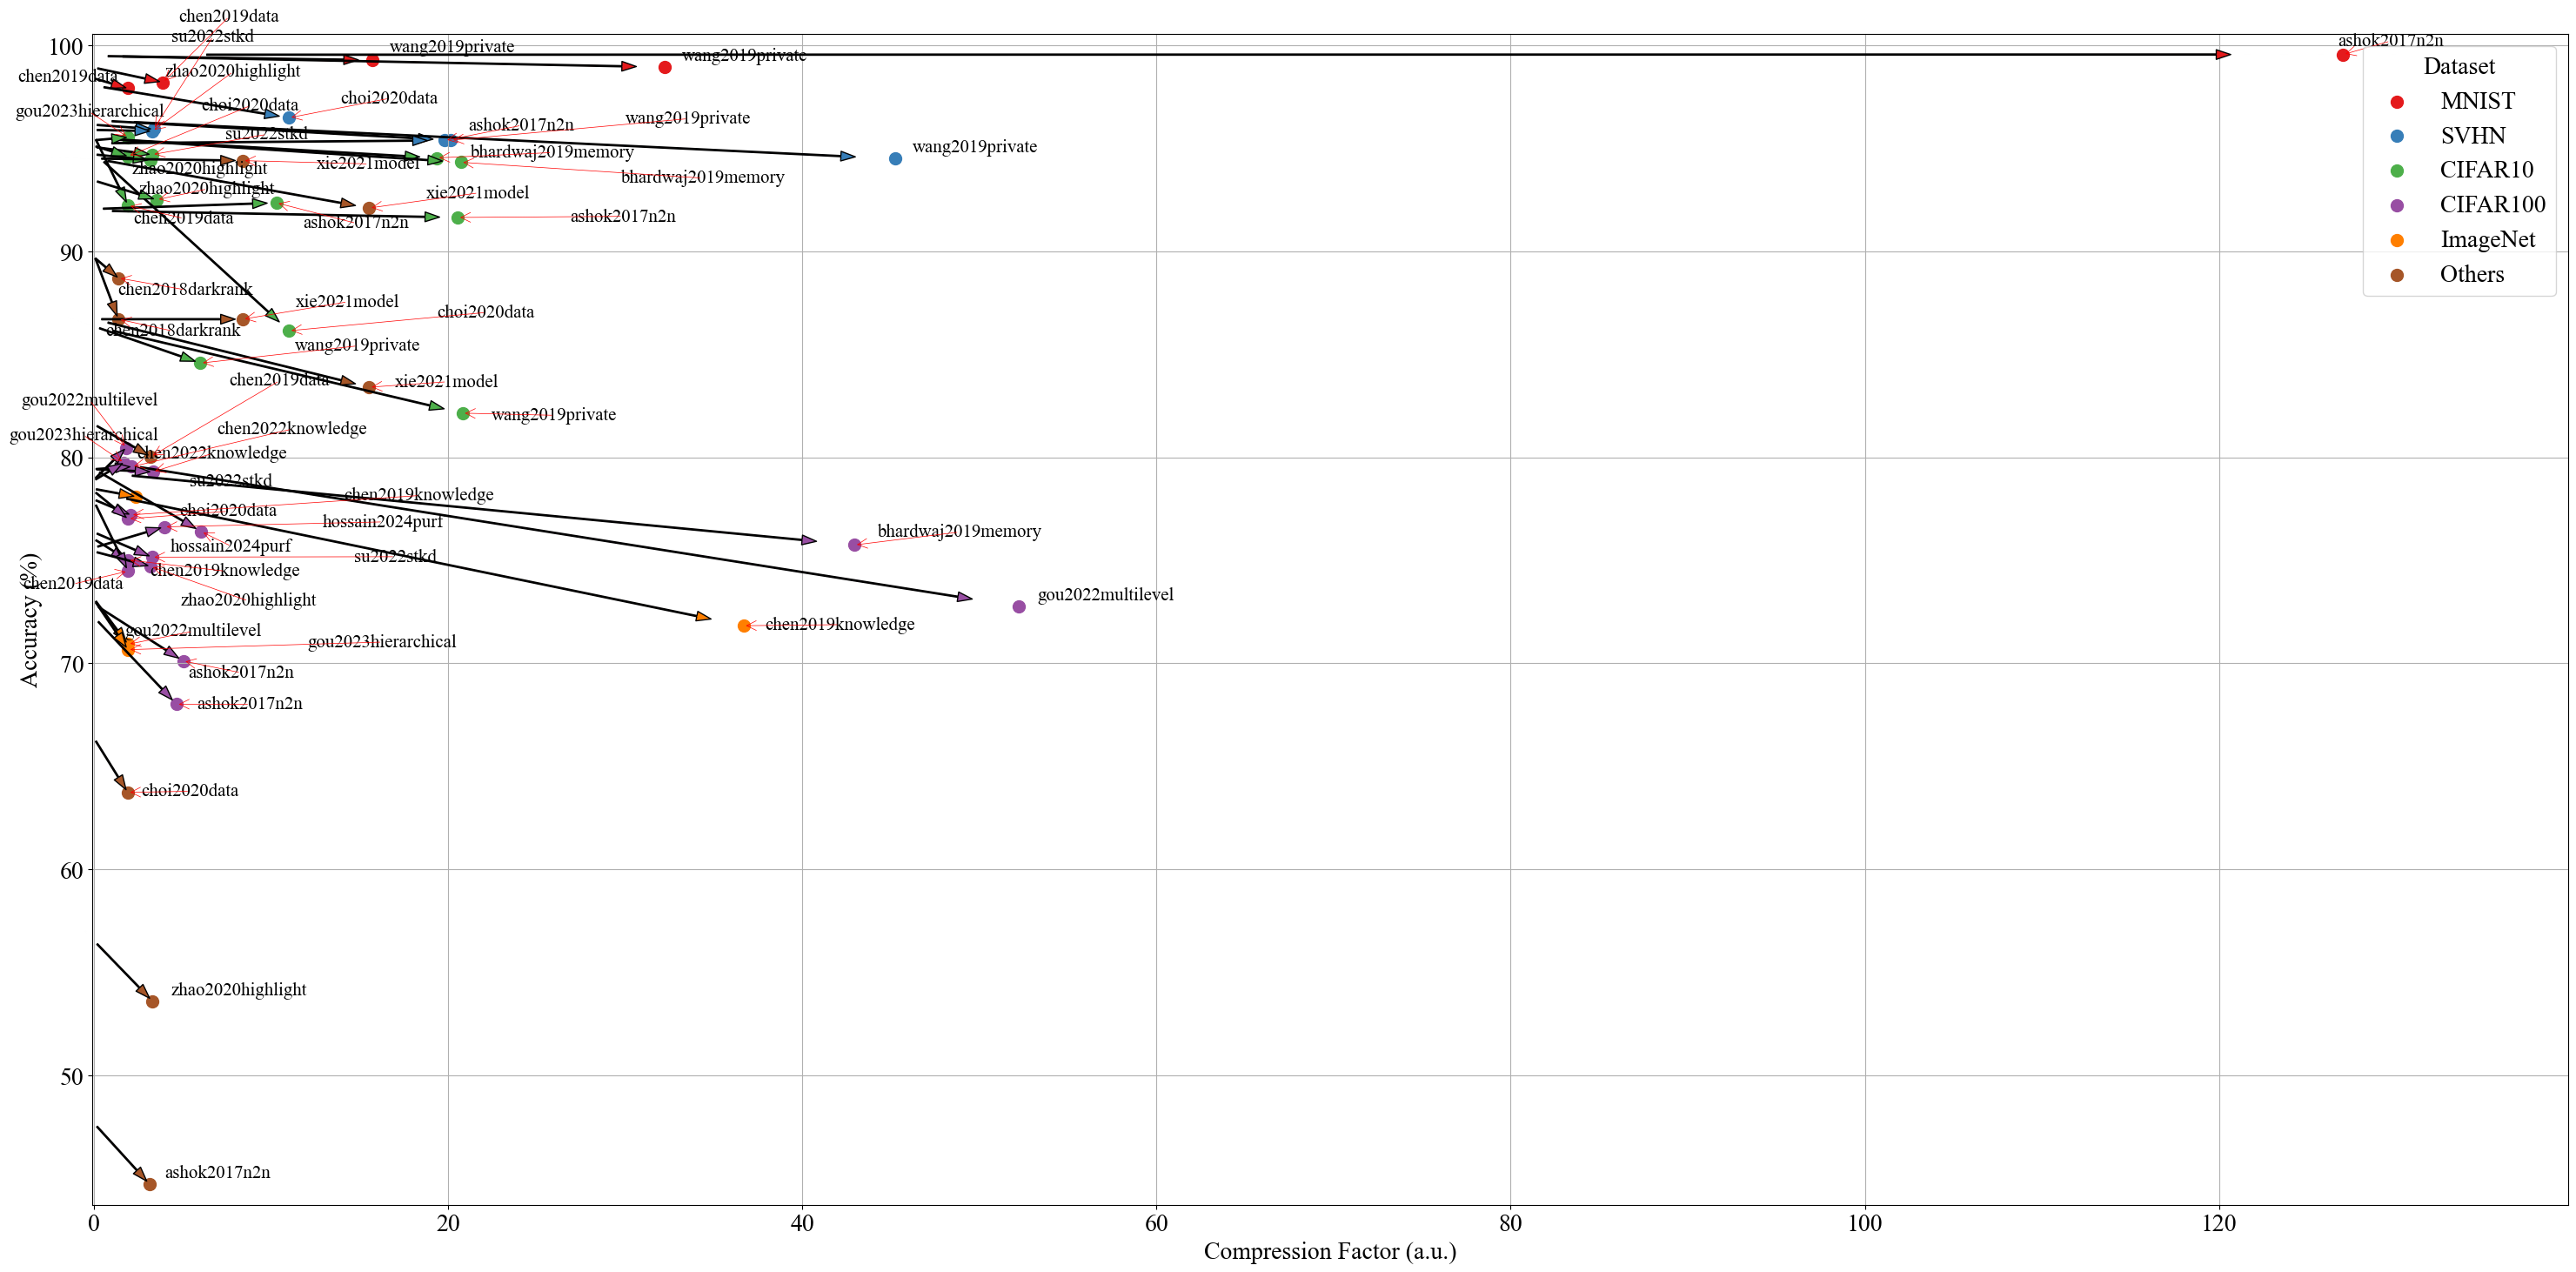

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from adjustText import adjust_text

# Assuming data is already loaded and 'Dataset Grouped' is created
unique_datasets = data['Dataset Grouped'].unique()
colors = sns.color_palette("Set1", n_colors=len(unique_datasets))
colors = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#a65628"]

# Plot settings
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(figsize=(30, 15))  # Single plot

# Prepare to collect all text objects for adjustment
texts = []

# Iterate over each dataset to plot
for i, dataset in enumerate(unique_datasets):
    subset = data[data['Dataset Grouped'] == dataset]

    # Calculate local limits for better visualization
    local_min_cf = 0  # Start from zero to include compression factor 0
    local_max_cf = subset['CF'].max() + (subset['CF'].max() - 0) * 0.1
    local_min_acc = min(subset['Student Distilled Acc. (%)'].min(), subset['Teacher Acc. (%)'].min())
    local_max_acc = max(subset['Student Distilled Acc. (%)'].max(), subset['Teacher Acc. (%)'].max())

    # Scatter plot
    ax.scatter(subset['CF'], subset['Student Distilled Acc. (%)'], color=colors[i], label=dataset, s=100)

    # Add text annotations and arrows
    for _, row in subset.iterrows():
        ax.annotate('', xy=(row['CF'], row['Student Distilled Acc. (%)']), xytext=(0, row['Teacher Acc. (%)']),
                    arrowprops=dict(facecolor=colors[i], shrink=0.05, width=1, headwidth=8))
        texts.append(ax.text(row['CF'], row['Student Distilled Acc. (%)'], row['Article'], fontsize=15, color="black"))

# Adjust text to avoid overlaps using adjust_text
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5), ax=ax,
            expand_points=(1.2, 1.4), expand_text=(1.2, 1.4), force_points=0.5)

# Set the plot limits to include all data comfortably
ax.set_xlim([-0.1, max(data['CF']) + (max(data['CF']) * 0.1)])
ax.set_ylim([min(data['Student Distilled Acc. (%)']) - 1, max(data['Student Distilled Acc. (%)']) + 1])

# Labels, legend, and grid
ax.set_xlabel("Compression Factor (a.u.)")
ax.set_ylabel("Accuracy (%)")
ax.legend(loc='upper right', title='Dataset')
ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

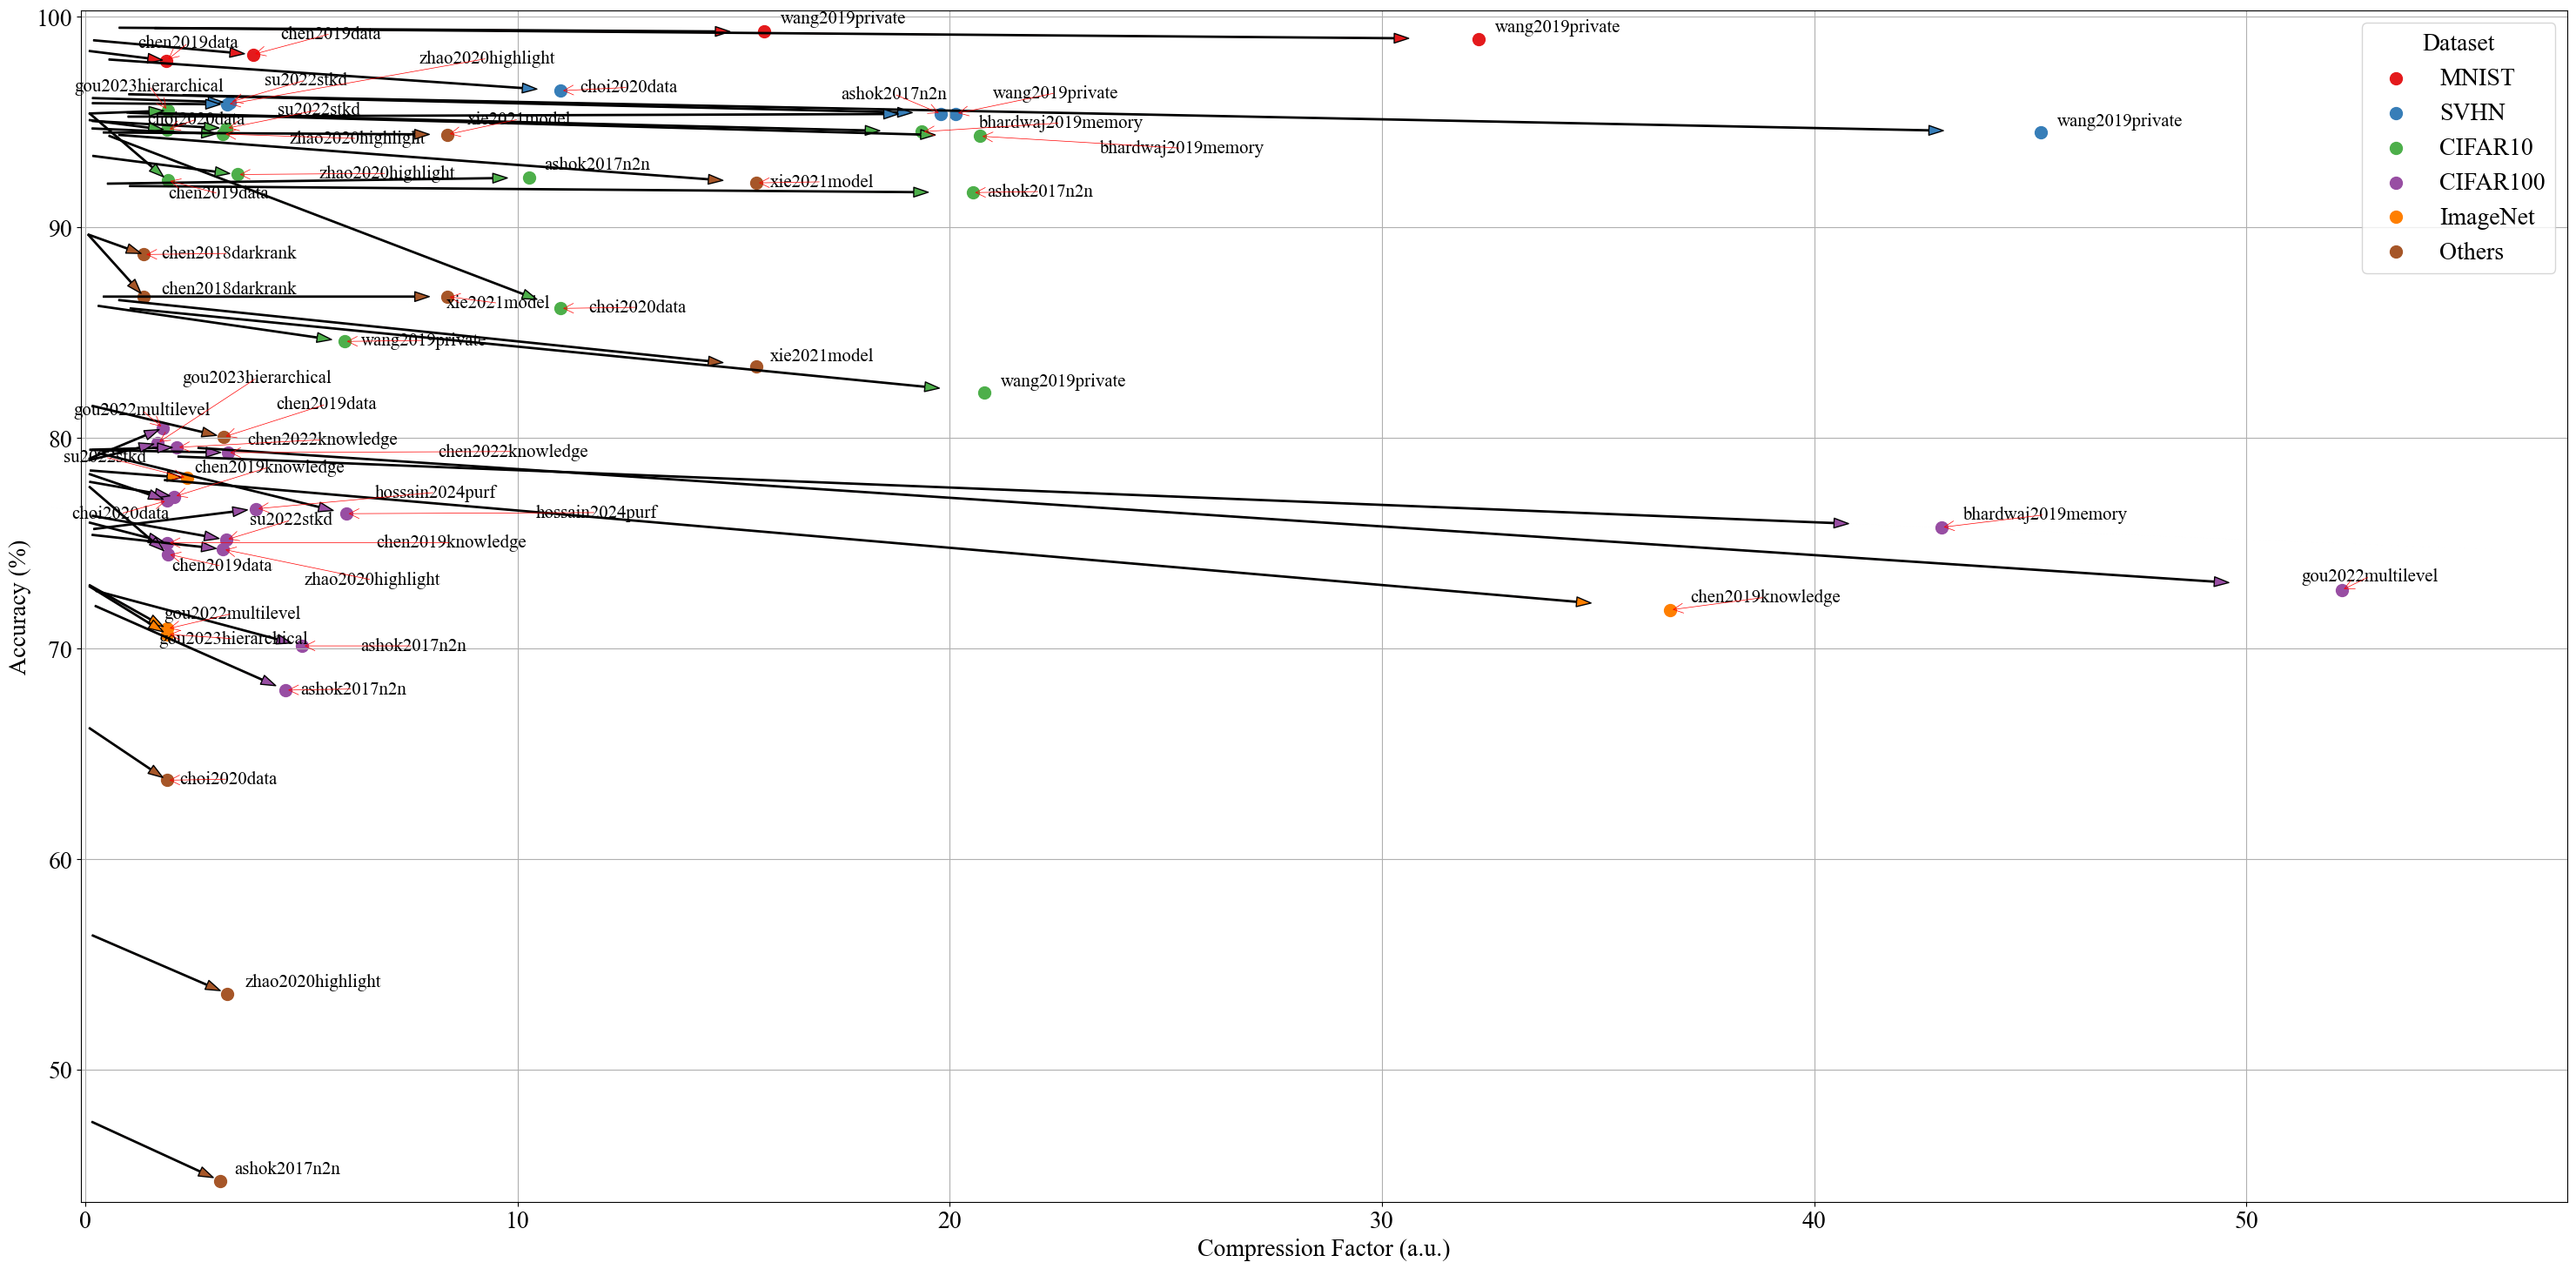

In [30]:
data = data[data["CF"] < 120]

# Assuming data is already loaded and 'Dataset Grouped' is created
unique_datasets = data['Dataset Grouped'].unique()
colors = sns.color_palette("Set1", n_colors=len(unique_datasets))
colors = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#a65628"]

# Plot settings
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(figsize=(30, 15))  # Single plot

# Prepare to collect all text objects for adjustment
texts = []

# Iterate over each dataset to plot
for i, dataset in enumerate(unique_datasets):
    subset = data[data['Dataset Grouped'] == dataset]

    # Calculate local limits for better visualization
    local_min_cf = 0  # Start from zero to include compression factor 0
    local_max_cf = subset['CF'].max() + (subset['CF'].max() - 0) * 0.1
    local_min_acc = min(subset['Student Distilled Acc. (%)'].min(), subset['Teacher Acc. (%)'].min())
    local_max_acc = max(subset['Student Distilled Acc. (%)'].max(), subset['Teacher Acc. (%)'].max())

    # Scatter plot
    ax.scatter(subset['CF'], subset['Student Distilled Acc. (%)'], color=colors[i], label=dataset, s=100)

    # Add text annotations and arrows
    for _, row in subset.iterrows():
        ax.annotate('', xy=(row['CF'], row['Student Distilled Acc. (%)']), xytext=(0, row['Teacher Acc. (%)']),
                    arrowprops=dict(facecolor=colors[i], shrink=0.05, width=1, headwidth=8))
        texts.append(ax.text(row['CF'], row['Student Distilled Acc. (%)'], row['Article'], fontsize=15, color="black"))

# Adjust text to avoid overlaps using adjust_text
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5), ax=ax,
            expand_points=(1.2, 1.4), expand_text=(1.2, 1.4), force_points=0.5)

# Set the plot limits to include all data comfortably
ax.set_xlim([-0.1, max(data['CF']) + (max(data['CF']) * 0.1)])
ax.set_ylim([min(data['Student Distilled Acc. (%)']) - 1, max(data['Student Distilled Acc. (%)']) + 1])

# Labels, legend, and grid
ax.set_xlabel("Compression Factor (a.u.)")
ax.set_ylabel("Accuracy (%)")
ax.legend(loc='upper right', title='Dataset')
ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()